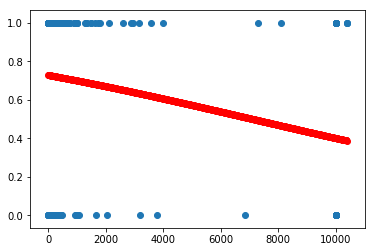

Train on full dataset, accuracy is 0.70492


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression

dfCytokine = pd.read_excel("data/workshop-content18/2-stpaul/data/Sepsis_patient_cytokine_levels.xlsx")
dfCytokine.dropna(inplace=True)
df2 = pd.read_excel("VASST Summary with VB numbers.xlsm")
result = pd.merge(dfCytokine,df2, on='SampleNumber')
res2=result.query('IL6 < 500000')

X=res2['IL6']
X=X.values.reshape(-1,1)
y=res2['D28Survival_Yes1_No0']
plt.scatter(X,y)

logreg = LogisticRegression(C=1)
logreg.fit(X,y)
X2=np.linspace(min(X),max(X),1000)
X2=np.reshape(X2,(-1,1))
y2=logreg.predict_proba(X2)[:,1]
plt.scatter(X2,y2,c='r')

plt.show()

yv=y.values
ypred=logreg.predict(X)
accuracy=np.count_nonzero(yv==ypred)/yv.size
print('Train on full dataset, accuracy is %.5f' % accuracy)

Train accuracy is 0.71765
Test accuracy is 0.70270


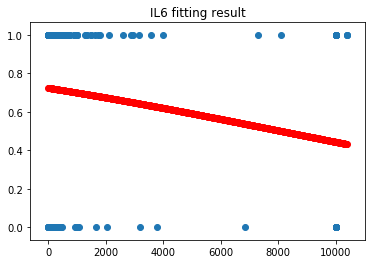

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

logreg = LogisticRegression(C=1)
logreg.fit(X_train,y_train)

yv=y_train.values
ypred=logreg.predict(X_train)
accuracy=np.count_nonzero(yv==ypred)/yv.size
print('Train accuracy is %.5f' % accuracy)

yv=y_test.values
ypred=logreg.predict(X_test)
accuracy=np.count_nonzero(yv==ypred)/yv.size
print('Test accuracy is %.5f' % accuracy)

plt.scatter(X,y)
X2=np.linspace(min(X),max(X),1000)
X2=np.reshape(X2,(-1,1))
y2=logreg.predict_proba(X2)[:,1]
plt.scatter(X2,y2,c='r')
plt.title('IL6 fitting result')
plt.show()